In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#NLTK libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from collections import Counter

# Machine Learning libraries
import sklearn
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing


#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

#Visualization libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Other miscellaneous libraries
from scipy import interp
from itertools import cycle
# import cufflinks as cf
from collections import defaultdict
from collections import Counter

# **Importing the Dataset**

In [ ]:
reviews = pd.read_csv('./Musical_instruments_reviews.csv')
print('Amazon Reviews for sentiment Analysis Dataset:')
reviews

Amazon Reviews for sentiment Analysis Dataset:


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014"


In [ ]:
reviews.info()

The shape of the  data is (row, column):(10261, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB
The Information about the dataset:None


In [ ]:
reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


# **Preprocessing of Dataset**

In [ ]:
#Checking for null values
print('The null values in the dataset:')
reviews.isnull().sum()

The null values in the dataset:


reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

There are null values in reviewerNames and reviewText. Reviewer names doesn't add any value as reviewID is present in the dataset
For reviewText dropping wouldn't be a problem as there are only 7 null values possibly due to ratings.

In [ ]:
reviews['reviewText'] = reviews['reviewText'].fillna('Missing')

In [ ]:
#reviews = reviews.dropna()
reviews.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

# Feature Engineering

To only look at one piece of text, let us combine 'reviewText' and 'summary', with the assumption that the summary is indeed the summary of the 'reviewText' column, and so reflects the same sentiment.

In [ ]:
reviews['reviews'] = reviews['reviewText'] + " " + reviews['summary']

# Remove 'reviewText' and 'summary' to simplify data
reviews = reviews.drop(['reviewText', 'summary'], axis=1)
reviews.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...


# Objective Sentiment

In [ ]:
def sent(rating):
    if rating['overall'] == 3:
        value = 'Neutral'
    elif rating['overall'] > 3:
        value = 'Positive'
    else:
        value = 'Negative'
    return value

In [ ]:
#Applying the function in our new column
reviews['Sentiment'] = reviews.apply(sent, axis=1)
reviews.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews,Sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac...",Positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...,Positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...,Positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...,Positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...,Positive


In [ ]:
print('The count of sentiments:')
reviews['Sentiment'].value_counts()

The count of sentiments:


Positive    9022
Neutral      772
Negative     467
Name: Sentiment, dtype: int64

# **Stop words**
Coming to stop words, general nltk stop words contains words like  “the”, “a”, “an”, “in”, and in our dataset "not", "hasn't", "would'nt" will conveys a negative sentiment. Removing such stop words will contradict the target variable(sentiment). So I have curated the stop words which doesn't have any negative sentiment or any negative alternatives.

In [ ]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each',
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above',
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't",
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from',
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs',
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [ ]:
reviews['reviews'] = reviews['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
reviews.head()

,reviewerID,asin,overall,reviews,Sentiment,year,month,day,helpful_review
0,A2IBPI20UZIR0U,1384719342,5.0,not much write but exactly supposed filters po...,Positive,2014,02,28,0.00
1,A14VAT5EAX3D9S,1384719342,5.0,product exactly quite affordablei not realized...,Positive,2013,03,16,0.93
2,A195EZSQDW3E21,1384719342,5.0,primary job device block breath would otherwis...,Positive,2013,08,28,1.00
3,A2C00NNG1ZQQG2,1384719342,5.0,nice windscreen protects mxl mic prevents pops...,Positive,2014,02,14,0.00
4,A94QU4C90B1AX,1384719342,5.0,pop filter great looks performs like studio fi...,Positive,2014,02,21,0.00


# **Bigram analysis**
Most frequent two words in reviews based on sentiments

In [ ]:
## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["reviews"]:
    for word in generate_ngrams(sent, 2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["reviews"]:
    for word in generate_ngrams(sent, 2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')


## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["reviews"]:
    for word in generate_ngrams(sent, 2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

In [ ]:
# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

In bigram (n = 2) analysis, where there are two words, somehow justify the sentiment categories.

In [ ]:
## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["reviews"]:
    for word in generate_ngrams(sent, 3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["reviews"]:
    for word in generate_ngrams(sent, 3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')


## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["reviews"]:
    for word in generate_ngrams(sent, 3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

In [ ]:
# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

# **Extracting Features from Reviews**
Before building the model for doing sentiment analysis, it is required to convert the review texts into vector formation as computer cannot understand words and their sentiment. After that TF-TDF method to convert the texts.

# **Encoding target variable-sentiment**

In [ ]:
# calling the label encoder function
le = preprocessing.LabelEncoder()

# Encode labels in column 'sentiment'.
reviews['Sentiment']= le.fit_transform(reviews['Sentiment'])

reviews['Sentiment'].unique()

array([2, 1, 0])

In [ ]:
reviews['Sentiment'].value_counts()

2    9022
1     772
0     467
Name: Sentiment, dtype: int64

In [ ]:
#Extracting 'reviews' for processing
review_features = reviews.copy()
review_features = review_features[['reviews']].reset_index(drop=True)
review_features.head()

,reviews
0,not much write but exactly supposed filters po...
1,product exactly quite affordablei not realized...
2,primary job device block breath would otherwis...
3,nice windscreen protects mxl mic prevents pops...
4,pop filter great looks performs like studio fi...


# **TFIDF(Term Frequency — Inverse Document Frequency)**
TF-IDF stands for “Term Frequency — Inverse Document Frequency”. This is a technique to quantify a word in documents, we generally compute a weight to each word which signifies the importance of the word in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.

Here we are splitting as bigram (two words) and consider their combined weight.Also we are taking only the top 5000 words from the reviews.

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features = 5000, ngram_range = (2,2))
# TF-IDF feature matrix
X = tfidf_vectorizer.fit_transform(review_features['reviews'])
X.shape

(10261, 5000)

We considered 5000 words, we can confirm that we have 5000 columns from the shape.

In [ ]:
#Getting the target variable(encoded)
y = reviews['Sentiment']
y.shape

(10261,)

# **Model Building**

# **Train - Test Split**
Using train test split function we are splitting the dataset into 80:20 ratio for train and test set respectively

In [ ]:
## Splitting the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state = 0), param_grid, cv = 5, verbose = 0,n_jobs = -1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:", best_model.score(X_test,y_test))

LogisticRegression(C=2.559547922699533, random_state=0)
The mean accuracy of the model is: 0.8913784705309303


From the selected parameters of C and random_state

In [ ]:
logreg = LogisticRegression(C = 6866.498, random_state = 0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


# **Classification metrics**
Since the accuracy turns out to be 94%, for classification problems,  confusion matrix and f1 score is required than accuracy alone.

Confusion matrix, without normalization


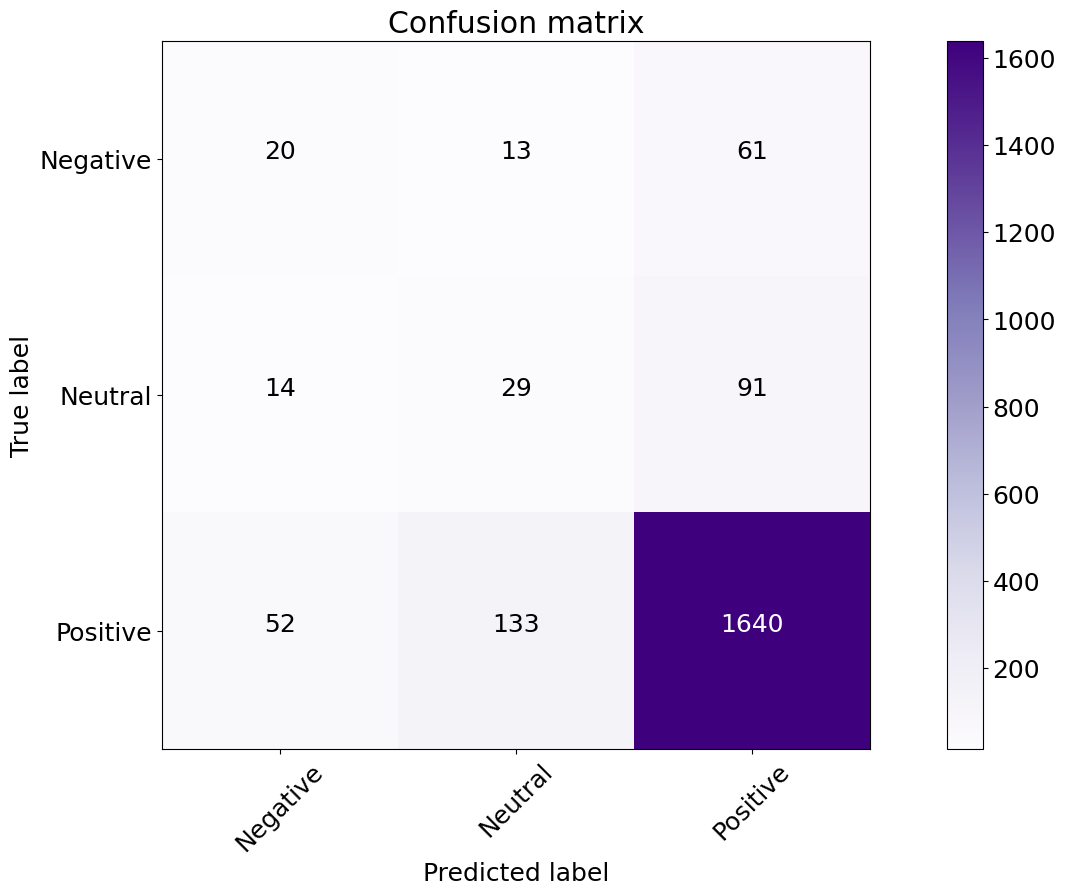

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Negative','Neutral','Positive'])

The diagonal elements (1846+1773+1472), they are correctly predicted records and rest are incorrectly classified by the algorithm.

In [ ]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.21      0.22        94
           1       0.17      0.22      0.19       134
           2       0.92      0.90      0.91      1825

    accuracy                           0.82      2053
   macro avg       0.44      0.44      0.44      2053
weighted avg       0.84      0.82      0.83      2053



# Own Code

In [ ]:
reviews_copy = reviews.copy()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
encoded_sentiment = ordinal_encoder.fit_transform(reviews_copy["Sentiment"].values.reshape(-1,1))
reviews_copy["Encoded_Sentiment"] = encoded_sentiment
reviews_copy

,reviewerID,asin,overall,reviews,Sentiment,year,month,day,helpful_review,review_len,word_count,Encoded_Sentiment
0,A2IBPI20UZIR0U,1384719342,5.0,not much write but exactly supposed filters po...,2,2014,02,28,0.00,162,25,2.0
1,A14VAT5EAX3D9S,1384719342,5.0,product exactly quite affordablei not realized...,2,2013,03,16,0.93,356,55,2.0
2,A195EZSQDW3E21,1384719342,5.0,primary job device block breath would otherwis...,2,2013,08,28,1.00,315,48,2.0
3,A2C00NNG1ZQQG2,1384719342,5.0,nice windscreen protects mxl mic prevents pops...,2,2014,02,14,0.00,169,22,2.0
4,A94QU4C90B1AX,1384719342,5.0,pop filter great looks performs like studio fi...,2,2014,02,21,0.00,136,21,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,5.0,great expected thank allfive stars,2,2014,07,20,0.00,34,5,2.0
10257,A1RPTVW5VEOSI,B00JBIVXGC,5.0,ive thinking trying nanoweb strings but bit pu...,2,2014,07,2,0.00,1870,291,2.0
10258,AWCJ12KBO5VII,B00JBIVXGC,4.0,tried coated strings past including elixirs ne...,2,2014,07,22,0.00,371,58,2.0
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,4.0,well made elixir developed taylor guitars stri...,2,2014,07,1,0.00,981,153,2.0


In [ ]:
reviews_csv = reviews_copy.to_csv("reviews_converted.csv")

### Step 1. Preprocessing text data

![](images/text_processing_pipeline_preprocessing.png)

In [ ]:
import nltk
import numpy as np
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

class Preprocessing:

    def __init__(self):

        self.data = './reviews_converted.csv'

        self.X_raw = None
        self.y = None
        self.X_cleaned = None
        self.X_tokenized = None
        self.X_stopwords_removed = None
        self.X_lemmatized = None
        #self.vocabular = None
        #self.word2idx = None
        #self.vector_size = None
        #self.X_encoded = None
        #self.X_padded = None

    def load_data(self):
        # Reads the raw csv file and split into
        # features (X) and target (y)

        df = pd.read_csv(self.data)
        #df.drop(['id','keyword','location'], axis=1, inplace=True)

        self.X_raw = df['reviews'].values
        self.y = df['Encoded_Sentiment'].values

    def clean_text(self):
        # Removes special symbols and just keep
        # words in lower or upper form

        self.X_cleaned = [x.lower() for x in self.X_raw]
        self.X_cleaned = [re.sub(r'[^\w\s]', '', x) for x in self.X_cleaned]

    def text_tokenized(self):
        # Tokenizes each sentence by implementing the nltk tool

        self.X_tokenized = [word_tokenize(x) for x in self.X_cleaned]

    def text_stopwords_removed(self):
        ## Create a list of stopwords

        stop_words = set(stopwords.words("english"))
        no_stopwords = []

        for tokens in self.X_tokenized:
            tokens = [token for token in tokens if token not in stop_words]
            no_stopwords.append(tokens)

        self.X_stopwords_removed = no_stopwords

    def text_lemmatized(self):

        lemmatizer = WordNetLemmatizer()

        text_lemmas = []
        for tokens in self.X_stopwords_removed:
            lemmas = [lemmatizer.lemmatize(word, pos="v") for word in tokens]
            lemmas = [lemmatizer.lemmatize(word, pos="n") for word in lemmas]
            lemmas = [lemmatizer.lemmatize(word, pos="a") for word in lemmas]
            lemmas = [lemmatizer.lemmatize(word, pos="r") for word in lemmas]
            lemmas = [lemmatizer.lemmatize(word, pos="s") for word in lemmas]
            text_lemmas.append(lemmas)

        self.X_lemmatized = text_lemmas

    #preprocessing.load_data()
    #preprocessing.clean_text()
    #preprocessing.text_tokenized()
    #preprocessing.text_stopwords_removed()
    #preprocessing.text_lemmatized()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LeeSo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LeeSo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\LeeSo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Step 2. Encoding the cleaned, tokenized, stopwords-removed and lemmatized text data

![](images/text_processing_pipeline_encoding.png)

In [ ]:
import copy

class Encoding:

    def __init__(self, lemmatized_texts, num_words):

        self.X_lemmatized = lemmatized_texts
        self.num_words = num_words
        self.vector_size = None
        self.fdist = None
        self.X_encoded_texts = None
        self.text4encoding = None
        self.X_padded_codes = None

    def text_encoding(self):

        vocabulary = dict()
        fdist = nltk.FreqDist()

        for tokens in self.X_lemmatized:
            for word in tokens:
                fdist[word] += 1

        self.fdist = fdist
        common_words = fdist.most_common(self.num_words)

        for idx, word in enumerate(common_words):
            vocabulary[word[0]] = (idx+1)

        self.vocabulary = vocabulary

        encoded_texts = list()
        texts4encoding = list()

        for tokens in self.X_lemmatized:
            temp_codes = list()
            temp_words = list()

            for word in tokens:
                if word in self.vocabulary.keys():
                    temp_codes.append(self.vocabulary[word])
                    temp_words.append(word)

            encoded_texts.append(temp_codes)
            texts4encoding.append(temp_words)

        self.vector_size = np.max([len(x) for x in encoded_texts])
        self.X_encoded_texts = encoded_texts
        self.texts4encoding = texts4encoding

    def codes_padding(self):
        pad_idx = 0
        padded_codes = list()

        codes_from_texts = copy.deepcopy(self.X_encoded_texts)
        for encoded_text in codes_from_texts:
            while len(encoded_text) < self.vector_size:
                encoded_text.append(pad_idx)
            padded_codes.append(encoded_text)

        self.X_padded_codes = np.array(padded_codes)


## Step 3. Building Dataset and DataLoader
![](images/text_processing_pipeline_dataset_dataloader.png)

In [ ]:
from torch.utils.data import Dataset, DataLoader

class DatasetMapping(Dataset):

    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


In [ ]:
from sklearn.model_selection import train_test_split

class   DatasetLoading:

    def __init__(self, padded_codes, targets):

        self.X = padded_codes
        self.y = targets
        self.X_train = None
        self.y_train = None
        self.X_test = None
        self.y_test = None

    def data_split(self):

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.20, random_state=20231116)

    def data_mapping(self):

        self.train = DatasetMapping(self.X_train, self.y_train)
        self.test = DatasetMapping(self.X_test, self.y_test)

    def data_loading(self):
        self.loader_train = DataLoader(self.train, batch_size=params.batch_size)
        self.loader_test = DataLoader(self.test, batch_size=params.batch_size)

## Building, training and evaluating the LSTM Model


In [ ]:
from dataclasses import dataclass

@dataclass
class Parameters:
    # Preprocessing parameters
    vector_size: int = 25   # standard length of each row vector in the input
    num_words: int = 5000  # number of words in the vocabulary
    test_size = 0.20
    random_state = 42

    # Model parameters
    embedding_dim: int = 256
    num_layers: int = 3 # number of lstm layers
    #out_size: int = 32
    #tride: int = 2
    #dilation: int = 2


    # Training parameters
    epochs: int = 20
    batch_size: int = 128
    learning_rate: float = 0.01
    dropout: float = 0.5

params=Parameters()

In [ ]:
### Step 1. Preprocessing
data = Preprocessing()
data.load_data()
data.clean_text()
data.text_tokenized()
data.text_stopwords_removed()
data.text_lemmatized()

### Step 2. Encoding
code = Encoding(data.X_lemmatized, params.num_words)
code.text_encoding()
code.codes_padding()

### Step 3. Dataset and DataLoader
dsl = DatasetLoading(code.X_padded_codes, data.y)
dsl.data_split()
dsl.data_mapping()
dsl.data_loading()

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LSTMNet(nn.Module):

    def __init__(self, params):
        super(LSTMNet, self).__init__()

        self.batch_size = params.batch_size
        self.hidden_dim = params.embedding_dim
        self.num_layers = params.num_layers
        self.input_size = params.num_words + 1

        self.dropout = nn.Dropout(params.dropout)
        self.embedding = nn.Embedding(self.input_size, self.hidden_dim, padding_idx=0)
        self.lstm = nn.LSTM(input_size=self.hidden_dim, hidden_size=self.hidden_dim, num_layers=self.num_layers, batch_first=True)

        self.fc1 = nn.Linear(in_features=self.hidden_dim, out_features=256)
        self.fc2 = nn.Linear(256, 3)  # Change to 3 for multiclass

    def forward(self, x):
        out = self.embedding(x)
        out, (hidden, cell) = self.lstm(out)  # Let LSTM handle its initial states
        out = self.dropout(out)
        out = torch.relu_(self.fc1(out[:, -1, :]))  # Get the output of the last time step
        out = self.dropout(out)
        out = self.fc2(out)  # No sigmoid activation for multiclass classification
        return out

In [ ]:
import math
import torch.optim as optim
from sklearn.metrics import precision_recall_fscore_support

lstm_model = LSTMNet(params)
optimizer = optim.RMSprop(lstm_model.parameters(), lr=params.learning_rate)

loader_train = dsl.loader_train
loader_test = dsl.loader_test
y_train = dsl.y_train
y_test = dsl.y_test

# Starts training phase
for epoch in range(params.epochs):

    lstm_model.train()
    train_loss = 0
    train_correct = 0

    # Lists to store true and predicted labels for calculating metrics
    all_true_labels = []
    all_predictions = []

    for x_batch, y_batch in loader_train:

        y_batch = y_batch.long()  # Ensure long type for labels

        y_pred = lstm_model(x_batch)

        loss = F.cross_entropy(y_pred, y_batch)  # Cross entropy for multiclass
        train_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(y_pred.data, 1)
        train_correct += (predicted == y_batch).sum().item()

    train_accuracy = train_correct / len(loader_train.dataset)

    # Evaluate the model
    lstm_model.eval()
    test_correct = 0

    with torch.no_grad():
        for x_batch, y_batch in loader_test:
            y_batch = y_batch.long()
            y_pred = lstm_model(x_batch)
            _, predicted = torch.max(y_pred.data, 1)
            test_correct += (predicted == y_batch).sum().item()
            # Store predictions and true labels
            all_true_labels.extend(y_batch.tolist())
            all_predictions.extend(predicted.tolist())

    test_accuracy = test_correct / len(loader_test.dataset)

    # Calculate precision, recall, and F1 score for the test set
    precision, recall, f1_score, _ = precision_recall_fscore_support(all_true_labels, all_predictions, average='macro')

    print(f"Epoch: {epoch + 1}, Loss: {train_loss / len(loader_train):.5f}, "
          f"Train Accuracy: {train_accuracy:.5f}, Test Accuracy: {test_accuracy:.5f}, "
          f"Precision: {precision:.5f}, Recall: {recall:.5f}, F1 Score: {f1_score:.5f}")

Epoch: 1, Loss: 1.74641, Train Accuracy: 0.83833, Test Accuracy: 0.87530, Precision: 0.29177, Recall: 0.33333, F1 Score: 0.31117
Epoch: 2, Loss: 0.48660, Train Accuracy: 0.88024, Test Accuracy: 0.87530, Precision: 0.29177, Recall: 0.33333, F1 Score: 0.31117
Epoch: 3, Loss: 0.48145, Train Accuracy: 0.88024, Test Accuracy: 0.87530, Precision: 0.29177, Recall: 0.33333, F1 Score: 0.31117
Epoch: 4, Loss: 0.46842, Train Accuracy: 0.88024, Test Accuracy: 0.87530, Precision: 0.29177, Recall: 0.33333, F1 Score: 0.31117
Epoch: 5, Loss: 0.46226, Train Accuracy: 0.88024, Test Accuracy: 0.87530, Precision: 0.29177, Recall: 0.33333, F1 Score: 0.31117
Epoch: 6, Loss: 0.46192, Train Accuracy: 0.88024, Test Accuracy: 0.87530, Precision: 0.29177, Recall: 0.33333, F1 Score: 0.31117
Epoch: 7, Loss: 0.45538, Train Accuracy: 0.88024, Test Accuracy: 0.87530, Precision: 0.29177, Recall: 0.33333, F1 Score: 0.31117
